케라스 데이터셋 로이터 데이터의 일반적 딥러닝테스트 학습시키지 않은 테스트 데이터 hidden layer의 수 4, 8,16,32,64 : 46개 클래스에 적용하기 위하여32개정도

In [14]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels)=reuters.load_data(num_words=10000)

len(train_data), len(test_data)

#train_data[5]

(8982, 2246)

In [15]:
word_index=reuters.get_word_index()
reverse_word_index=dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire=' '.join([reverse_word_index.get(i-3, '?') for i in train_data[5]])
print(decoded_newswire)

? the u s agriculture department estimated canada's 1986 87 wheat crop at 31 85 mln tonnes vs 31 85 mln tonnes last month it estimated 1985 86 output at 24 25 mln tonnes vs 24 25 mln last month canadian 1986 87 coarse grain production is projected at 27 62 mln tonnes vs 27 62 mln tonnes last month production in 1985 86 is estimated at 24 95 mln tonnes vs 24 95 mln last month canadian wheat exports in 1986 87 are forecast at 19 00 mln tonnes vs 18 00 mln tonnes last month exports in 1985 86 are estimated at 17 71 mln tonnes vs 17 72 mln last month reuter 3


In [16]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
	results=np.zeros((len(sequences), dimension))
	for i, sequence in enumerate(sequences):
		results[i, sequence]=1.
	return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

def to_one_hot(labels, dimension=46):
	results=np.zeros((len(labels), dimension))
	for i, label in enumerate(labels):
		results[i, label] =1.
	return results

one_hot_train_labels=to_one_hot(train_labels)
one_hot_test_labels=to_one_hot(test_labels)

from keras.utils.np_utils import to_categorical

one_hot_train_labels=to_categorical(train_labels)
one_hot_test_labels=to_categorical(test_labels)

In [23]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

y_train = one_hot_train_labels
y_test = one_hot_test_labels 

history=model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/20
18/18 [==============================] - 1s 38ms/step - loss: 3.5914 - accuracy: 0.0916 - val_loss: 3.2576 - val_accuracy: 0.3379
Epoch 2/20
18/18 [==============================] - 0s 25ms/step - loss: 2.8844 - accuracy: 0.4791 - val_loss: 2.5556 - val_accuracy: 0.5370
Epoch 3/20
18/18 [==============================] - 1s 30ms/step - loss: 2.1702 - accuracy: 0.5725 - val_loss: 1.9943 - val_accuracy: 0.5793
Epoch 4/20
18/18 [==============================] - 0s 26ms/step - loss: 1.6948 - accuracy: 0.6074 - val_loss: 1.7177 - val_accuracy: 0.6020
Epoch 5/20
18/18 [==============================] - 0s 27ms/step - loss: 1.4503 - accuracy: 0.6448 - val_loss: 1.5902 - val_accuracy: 0.6202
Epoch 6/20
18/18 [==============================] - 0s 26ms/step - loss: 1.3023 - accuracy: 0.6776 - val_loss: 1.5181 - val_accuracy: 0.6354
Epoch 7/20
18/18 [==============================] - 0s 27ms/step - loss: 1.1915 - accuracy: 0.7045 - val_loss: 1.4666 - val_accuracy: 0.6469
Epoch 8/20
18

C:\Users\PC\AppData\Local\Temp\ipykernel_16652\2841500642.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'bo', label='Training loss', color='red')
C:\Users\PC\AppData\Local\Temp\ipykernel_16652\2841500642.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, 'b', label='Validation loss', color='blue')


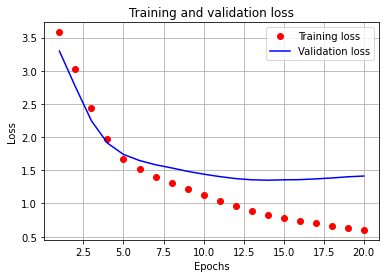

C:\Users\PC\AppData\Local\Temp\ipykernel_16652\2841500642.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'bo', label='Training acc', color='grey')
C:\Users\PC\AppData\Local\Temp\ipykernel_16652\2841500642.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b', label='Validation acc', color='purple')


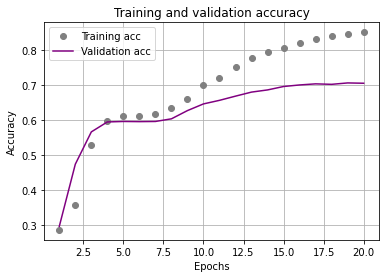

In [18]:
import matplotlib.pyplot as plt


loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss', color='red')
plt.plot(epochs, val_loss, 'b', label='Validation loss', color='blue')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

plt.clf()

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc', color='grey')
plt.plot(epochs, val_acc, 'b', label='Validation acc', color='purple')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

In [19]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

y_train = one_hot_train_labels
y_test = one_hot_test_labels 

history=model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/20
18/18 [==============================] - 1s 38ms/step - loss: 3.5491 - accuracy: 0.1486 - val_loss: 3.2727 - val_accuracy: 0.2965
Epoch 2/20
18/18 [==============================] - 0s 25ms/step - loss: 2.9200 - accuracy: 0.3723 - val_loss: 2.6355 - val_accuracy: 0.5071
Epoch 3/20
18/18 [==============================] - 0s 26ms/step - loss: 2.2128 - accuracy: 0.6040 - val_loss: 2.0187 - val_accuracy: 0.6180
Epoch 4/20
18/18 [==============================] - 0s 25ms/step - loss: 1.6625 - accuracy: 0.6659 - val_loss: 1.6567 - val_accuracy: 0.6371
Epoch 5/20
18/18 [==============================] - 0s 26ms/step - loss: 1.3516 - accuracy: 0.6953 - val_loss: 1.4774 - val_accuracy: 0.6598
Epoch 6/20
18/18 [==============================] - 0s 25ms/step - loss: 1.1517 - accuracy: 0.7371 - val_loss: 1.3631 - val_accuracy: 0.6999
Epoch 7/20
18/18 [==============================] - 0s 26ms/step - loss: 0.9940 - accuracy: 0.7861 - val_loss: 1.2752 - val_accuracy: 0.7297
Epoch 8/20
18

In [20]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

y_train = one_hot_train_labels
y_test = one_hot_test_labels 

history=model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/20
18/18 [==============================] - 1s 38ms/step - loss: 3.4109 - accuracy: 0.1931 - val_loss: 2.8168 - val_accuracy: 0.5254
Epoch 2/20
18/18 [==============================] - 0s 25ms/step - loss: 2.2800 - accuracy: 0.5878 - val_loss: 1.9015 - val_accuracy: 0.6158
Epoch 3/20
18/18 [==============================] - 0s 27ms/step - loss: 1.5118 - accuracy: 0.6854 - val_loss: 1.4605 - val_accuracy: 0.6870
Epoch 4/20
18/18 [==============================] - 0s 25ms/step - loss: 1.1339 - accuracy: 0.7544 - val_loss: 1.2785 - val_accuracy: 0.7226
Epoch 5/20
18/18 [==============================] - 0s 27ms/step - loss: 0.9229 - accuracy: 0.7964 - val_loss: 1.1875 - val_accuracy: 0.7386
Epoch 6/20
18/18 [==============================] - 0s 25ms/step - loss: 0.7708 - accuracy: 0.8302 - val_loss: 1.1231 - val_accuracy: 0.7547
Epoch 7/20
18/18 [==============================] - 0s 26ms/step - loss: 0.6471 - accuracy: 0.8611 - val_loss: 1.0791 - val_accuracy: 0.7676
Epoch 8/20
18

In [21]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

y_train = one_hot_train_labels
y_test = one_hot_test_labels 

history=model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/20
18/18 [==============================] - 1s 40ms/step - loss: 3.3170 - accuracy: 0.4236 - val_loss: 2.7070 - val_accuracy: 0.5904
Epoch 2/20
18/18 [==============================] - 1s 32ms/step - loss: 2.1956 - accuracy: 0.6084 - val_loss: 1.8794 - val_accuracy: 0.6220
Epoch 3/20
18/18 [==============================] - 0s 27ms/step - loss: 1.5373 - accuracy: 0.6718 - val_loss: 1.4863 - val_accuracy: 0.6696
Epoch 4/20
18/18 [==============================] - 0s 27ms/step - loss: 1.1954 - accuracy: 0.7326 - val_loss: 1.2863 - val_accuracy: 0.7106
Epoch 5/20
18/18 [==============================] - 0s 26ms/step - loss: 0.9586 - accuracy: 0.7939 - val_loss: 1.1522 - val_accuracy: 0.7524
Epoch 6/20
18/18 [==============================] - 0s 26ms/step - loss: 0.7692 - accuracy: 0.8411 - val_loss: 1.0605 - val_accuracy: 0.7738
Epoch 7/20
18/18 [==============================] - 0s 26ms/step - loss: 0.6114 - accuracy: 0.8760 - val_loss: 0.9938 - val_accuracy: 0.7823
Epoch 8/20
18

In [22]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

y_train = one_hot_train_labels
y_test = one_hot_test_labels 

history=model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/20
18/18 [==============================] - 1s 39ms/step - loss: 3.2363 - accuracy: 0.4414 - val_loss: 2.4000 - val_accuracy: 0.5378
Epoch 2/20
18/18 [==============================] - 0s 26ms/step - loss: 1.8489 - accuracy: 0.6300 - val_loss: 1.5669 - val_accuracy: 0.6736
Epoch 3/20
18/18 [==============================] - 1s 29ms/step - loss: 1.2408 - accuracy: 0.7344 - val_loss: 1.2770 - val_accuracy: 0.7199
Epoch 4/20
18/18 [==============================] - 1s 28ms/step - loss: 0.9409 - accuracy: 0.7970 - val_loss: 1.1293 - val_accuracy: 0.7565
Epoch 5/20
18/18 [==============================] - 1s 29ms/step - loss: 0.7218 - accuracy: 0.8473 - val_loss: 1.0264 - val_accuracy: 0.7760
Epoch 6/20
18/18 [==============================] - 0s 28ms/step - loss: 0.5485 - accuracy: 0.8886 - val_loss: 0.9710 - val_accuracy: 0.7845
Epoch 7/20
18/18 [==============================] - 0s 27ms/step - loss: 0.4244 - accuracy: 0.9124 - val_loss: 0.9382 - val_accuracy: 0.7947
Epoch 8/20
18